In [2]:
from python_speech_features import mfcc
from python_speech_features import logfbank
from sklearn.model_selection import train_test_split
import scipy.io.wavfile as wav
import numpy as np
import os


In [4]:
data = []
label = []
label_name = []

data_path = "../data"

i = 0
for dir in os.listdir(data_path):
    if dir[0] != ".":
        files = os.listdir(data_path+"/"+dir)
        for file in files:
            if file[0] != ".":
                label_name.append(dir)
                label.append(i)
                f = data_path+"/"+dir+"/"+file
                if os.path.isfile(f):
                    (rate,sig) = wav.read(f)
                    data.append(mfcc(sig, rate, nfft=2048)[:300,1:].flatten())
        i += 1

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.5)

for d in data:
    print(len(d))

3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600
3600


In [6]:
from sklearn import metrics
from sklearn.linear_model import SGDClassifier

In [7]:
sgd_clf = SGDClassifier(random_state=0, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train)


SGDClassifier(random_state=0)

In [8]:
data[1]

array([  6.51289734,  -7.31649925, -11.79307566, ...,   7.44034213,
         4.22969367,  -4.32737936])

In [ ]:
y_pred = sgd_clf.predict(X_test)

In [ ]:
for p, a in zip(y_pred, y_test):
    print(f"pred: {p}  -  actual: {a}")

pred: 0  -  actual: 1
pred: 0  -  actual: 0
pred: 0  -  actual: 0
pred: 0  -  actual: 0
pred: 0  -  actual: 0
pred: 0  -  actual: 1
pred: 0  -  actual: 0
pred: 0  -  actual: 0
pred: 0  -  actual: 1
pred: 0  -  actual: 0
pred: 0  -  actual: 1
pred: 0  -  actual: 0
pred: 0  -  actual: 0
pred: 0  -  actual: 0
pred: 0  -  actual: 1
pred: 0  -  actual: 1


In [ ]:
sgd_clf.score(X_test, y_test)

0.625

In [ ]:
metrics.confusion_matrix(y_test, y_pred)

array([[10,  0],
       [ 6,  0]])

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

/opt/homebrew/Caskroom/miniforge/base/envs/wrist/lib/python3.10/site-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


/opt/homebrew/Caskroom/miniforge/base/envs/wrist/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


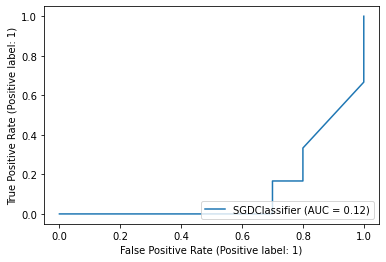

In [ ]:
metrics.plot_roc_curve(sgd_clf, X_test, y_test)